In [1]:
# Most of this code will be following the Kaggle Kernel https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.special import boxcox1p

In [3]:
%run "Auxiliary Functions.ipynb"

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#trtecombined = train.append(test)
print(train.shape,test.shape)


(1460, 81) (1459, 80)


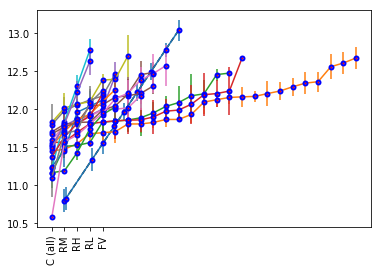

In [5]:
train['SalePrice'] = np.log1p(train['SalePrice'])
train = train[train.GrLivArea<4500]
train = train[train.GarageArea<1220]
train = train[train.TotRmsAbvGrd<12]

#Converting cartain numerical categories to numerical ones with monotonic relationship
cattonum1(train,test,'OverallQual','SalePrice')
cattonum(train,test,'Neighborhood','SalePrice')
cattonum(train,test,'Exterior1st','SalePrice')
cattonum(train,test,'Exterior2nd','SalePrice')
cattonum(train,test,'SaleCondition','SalePrice')
cattonum(train,test,'Condition1','SalePrice')
##cattonum(train,test,'Condition2','SalePrice')
cattonum(train,test,'HouseStyle','SalePrice')
cattonum(train,test,'RoofStyle','SalePrice')
cattonum(train,test,'RoofMatl','SalePrice')
cattonum(train,test,'ExterQual','SalePrice')
cattonum(train,test,'ExterCond','SalePrice')
cattonum(train,test,'Foundation','SalePrice')
cattonum(train,test,'Heating','SalePrice')
cattonum(train,test,'HeatingQC','SalePrice')
cattonum(train,test,'KitchenQual','SalePrice')
cattonum(train,test,'SaleType','SalePrice')

cattonum(train,test,'TotRmsAbvGrd','SalePrice')

#cattonum(train,test,'MSSubClass','SalePrice')
cattonum(train,test,'MSZoning','SalePrice')



all_data = pd.concat([train.drop('SalePrice',axis=1),test])
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

#objects = []
#for i in all_data.columns:
#    if all_data[i].dtype == object:
#        objects.append(i)
#all_data.update(all_data[objects].fillna('None'))

all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


#all_data['QualNeigh'] = all_data['OverallQual']*all_data['Neighborhood']

#numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

train = pd.concat([all_data.iloc[0:train.shape[0]],train['SalePrice']],axis=1)
test = all_data.iloc[train.shape[0]:]



In [6]:
#numeric_feats = train.dtypes[train.dtypes != "object"].index

#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index
#print(skewed_feats)
#train[skewed_feats] = np.log1p(train[skewed_feats])
#train[skewed_feats] = boxcox1p(train[skewed_feats],0.15)

In [7]:
train = train.assign(TotalSF=pd.Series(np.zeros(train.shape[0])).values)
train['TotalSF'] = train['1stFlrSF']+train['2ndFlrSF']+train['TotalBsmtSF']
#train.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)
test = test.assign(TotalSF=pd.Series(np.zeros(test.shape[0])).values)
test['TotalSF'] = test['1stFlrSF']+test['2ndFlrSF']+test['TotalBsmtSF']
#test.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)

In [8]:
droplist = list(set(pd.get_dummies(train).columns.values)-set(pd.get_dummies(test).columns.values))
droplist.remove('SalePrice')


all_data = pd.concat([train.drop('SalePrice',axis=1),test])
all_data = pd.get_dummies(all_data)

train = pd.concat([all_data.iloc[0:train.shape[0]],train['SalePrice']],axis=1)
test = all_data.iloc[train.shape[0]:]

print(train.shape,test.shape)


(1443, 185) (1459, 184)


(1443, 179)
151.99110829529332
['OverallQual' 'TotalSF' 'Total_sqr_footage' 'Neighborhood' 'GrLivArea'
 'GarageCars' 'ExterQual' 'Total_Bathrooms' 'KitchenQual' 'GarageArea'
 'YrBltAndRemod' 'TotalBsmtSF' '1stFlrSF' 'YearBuilt' 'FullBath'
 'YearRemodAdd' 'Foundation' 'TotRmsAbvGrd' 'FireplaceQu_None'
 'hasfireplace' 'GarageYrBlt' 'Fireplaces' 'BsmtQual_TA' 'HeatingQC'
 'BsmtQual_Ex' 'BsmtFinType1_GLQ' 'GarageFinish_Unf' 'GarageType_Attchd'
 'MasVnrArea' 'GarageFinish_Fin' 'Exterior1st' 'MSZoning' 'Exterior2nd'
 'BsmtFinSF1' 'GarageType_Detchd' 'Total_porch_sf' 'MasVnrType_None'
 'GarageCond_TA' 'LotFrontage' 'CentralAir_N' 'CentralAir_Y'
 'GarageQual_TA' 'FireplaceQu_Gd' 'BsmtQual_Gd' 'WoodDeckSF' 'SaleType'
 'GarageType_None' 'GarageFinish_None' 'GarageQual_None' 'GarageCond_None'
 'hasgarage' 'OpenPorchSF' 'MasVnrType_Stone' 'HouseStyle' '2ndFlrSF'
 'HalfBath' 'Electrical_SBrkr' 'PavedDrive_Y' 'PavedDrive_N'
 'LotShape_Reg' 'SaleCondition' 'BsmtExposure_Gd' 'LotShape_IR1' 'LotArea'
 

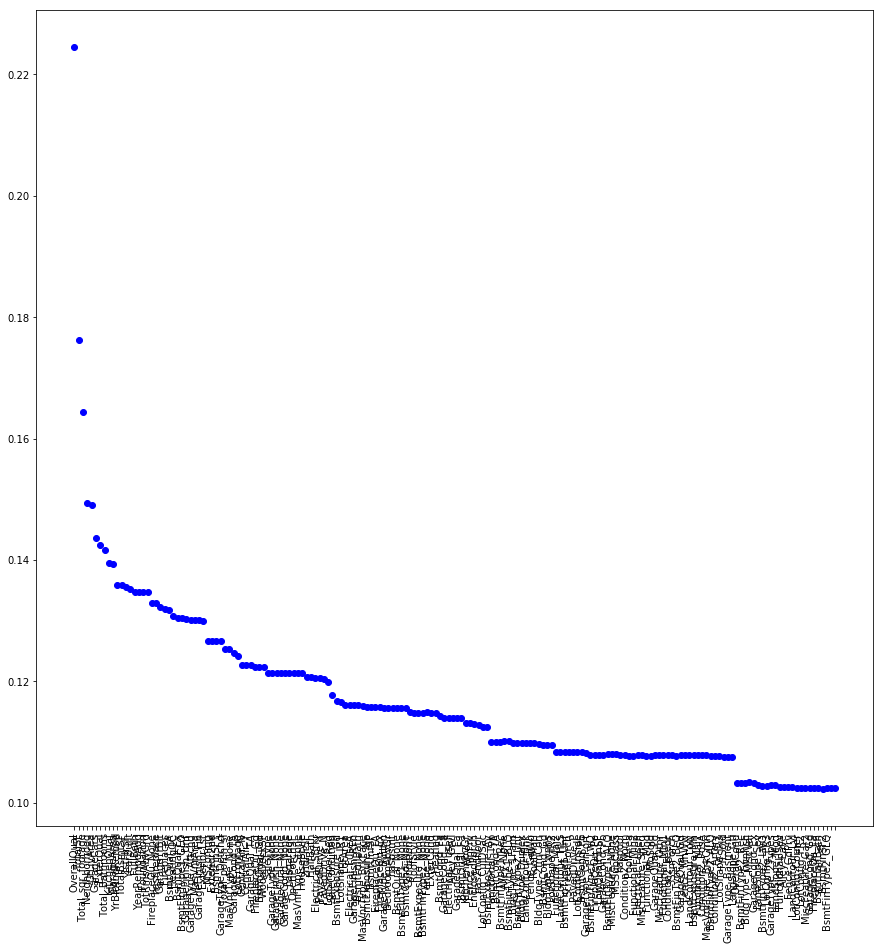

In [9]:
#Now let us try features engineering with each variable by considering each one individually. The challenge will be to get
#better features but not Overfitting
train_cont = dropcategorical(train,test,1)[0]#Note that drop categorical also drops non-numerical values
test_fin = dropcategorical(train,test,1)[1]#Note that drop categorical also drops non-numerical values

train_cont.drop('Id',axis=1,inplace=True)
test_fin.drop('Id',axis=1,inplace=True)

train_cont.drop(droplist,axis=1,inplace=True)
test_fin.drop(droplist,axis=1,inplace=True)

#train_cont.drop(['Electrical_Mix','Condition2_RRNn','GarageQual_Ex','Condition2_RRAn','Utilities_NoSeWa','PoolQC_Fa'],axis=1,inplace=True)
#test_fin.drop(['Electrical_Mix','Condition2_RRNn','GarageQual_Ex','Condition2_RRAn','Utilities_NoSeWa','PoolQC_Fa'],axis=1,inplace=True)

train_cont = train_cont.fillna(train_cont.mean())
test_fin = test_fin.fillna(test_fin.mean())


#train_cont = train_cont[train_cont.GarageArea!=0]
print(train_cont.shape)

###OverallQual
#plt.plot(train_cont['OverallQual'],train_cont['SalePrice'],'bo')

#The feature looks like it has an exponential dependence so maybe change it to an exponential of itself
#train_cont['OverallQual'] = np.exp(0.5*train['OverallQual'])
#test_fin['OverallQual'] = np.exp(0.5*test['OverallQual'])
# scan by hand finds 0.5 as the coefficient which minimes the error
#Now to make a heat map of the corelation matrix

# This looks like a more or less linear relationship as we would expect. But lets play around with it a little bit
#n = 1 works best
train_cont['TotalSF']=np.log1p(train_cont['TotalSF'])
test_fin['TotalSF']=np.log1p(test_fin['TotalSF'])

train_cont['Neighborhood'] = train['Neighborhood']**1.5
test_fin['Neighborhood'] = test_fin['Neighborhood']**1.5

#train_cont['GarageArea'] = train_cont['GarageArea']**1
#test_fin['GarageArea'] = test_fin['GarageArea']**1

train_cont['OverallCond'] = train['OverallCond']**0.7
test_fin['OverallCond'] = test['OverallCond']**0.7

train_cont['GrLivArea'] = np.log1p(train_cont['GrLivArea'])
test_fin['GrLivArea'] = np.log1p(test_fin['GrLivArea'])

train_cont['TotalBsmtSF'][train['TotalBsmtSF']<10]=600 #shifts the 0 points close to the points
train_cont['TotalBsmtSF']=np.log1p(train_cont['TotalBsmtSF']) #shifts the 0 points close to the points

test_fin['TotalBsmtSF'][test['TotalBsmtSF']<10]=600 #shifts the 0 points close to the points
test_fin['TotalBsmtSF']=np.log1p(test_fin['TotalBsmtSF']) #shifts the 0 points close to the points


train_cont['GarageArea'][train['GarageArea']<10]=200 #shifts the 0 points close to the points
train_cont['GarageArea']=np.log1p(train_cont['GarageArea']) #shifts the 0 points close to the points

test_fin['GarageArea'][test['GarageArea']<10]=200 #shifts the 0 points close to the points
test_fin['GarageArea']=np.log1p(test_fin['GarageArea']) #shifts the 0 points close to the points

train_cont['1stFlrSF']=np.log1p(train['1stFlrSF']) #shifts the 0 points close to the points
test_fin['1stFlrSF']=np.log1p(test['1stFlrSF']) #shifts the 0 points close to the points

train_cont['TotRmsAbvGrd'][train_cont['TotRmsAbvGrd']==1]=2

corrmat = train_cont.corr()
f, ax = plt.subplots(figsize=(15, 15))
#sns.heatmap(corrmat, vmax=.8, square=True);
k = train_cont.shape[1] #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_cont[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

el = []
for x in range(1,train_cont.shape[1]):
    e,a,l,t,p = withncontfeatures(train_cont,test_fin,x)
    el.append(e)
print(a)
ans = np.exp(t)    
labels = withncontfeatures(train_cont,test_fin,x)[2]
print(labels)
plt.plot(range(1,train_cont.shape[1]),el,'bo')
plt.xticks(range(1,train_cont.shape[1]), labels, rotation='vertical')

print(el)

In [10]:
saleprice = pd.DataFrame(ans, columns=['SalePrice'])
results = pd.concat([test['Id'],saleprice['SalePrice']],axis=1)
results.head()

,Id,SalePrice
0,1461,116589.681291
1,1462,169478.890053
2,1463,184487.513467
3,1464,200301.417929
4,1465,190037.413324


In [11]:
results.to_csv('housepricing_submission.csv', index = False)

In [12]:
0.1095301180067197

0.1095301180067197

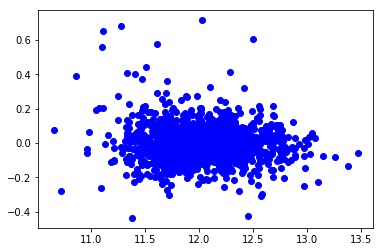

In [13]:
plt.plot(p,p-train['SalePrice'],'bo')

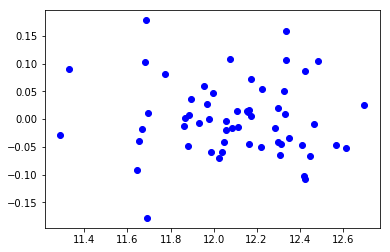

In [14]:
plt.plot(p[train['Neighborhood']==13],(p-train['SalePrice'])[train['Neighborhood']==13],'bo')

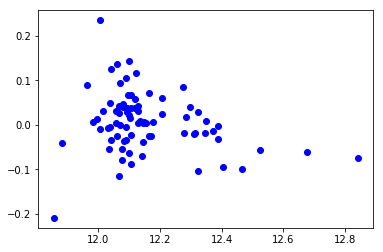

In [15]:
plt.plot(train['SalePrice'][train['Neighborhood']==15],(p-train['SalePrice'])[train['Neighborhood']==15],'bo')

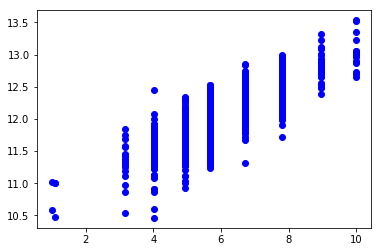

In [16]:
plt.plot(train['OverallQual'],train['SalePrice'],'bo')

In [17]:
train[p-train['SalePrice']>0.25]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SalePrice
30,31,70,1.0,50.0,8500,1,2,8,4.030466,4,...,0,0,1,0,0,0,1,0,0,10.596660
66,67,20,4.0,73.0,19900,10,9,5,6.715306,5,...,0,0,0,0,1,0,1,0,0,12.100718
308,309,30,4.0,64.5,12342,6,4,5,4.030466,5,...,0,0,0,0,1,0,1,0,0,11.320566
410,411,20,4.0,68.0,9571,6,4,5,4.929914,3,...,0,0,0,0,1,0,1,0,0,11.002117
462,463,20,4.0,60.0,8281,7,4,5,4.929914,5,...,0,1,0,0,0,0,1,0,0,11.041064
479,480,30,2.0,50.0,5925,5,4,5,4.030466,7,...,0,0,1,0,0,0,1,0,0,11.401681
495,496,30,1.0,60.0,7879,1,4,5,4.030466,5,...,0,1,0,0,0,0,1,0,0,10.460271
535,536,190,4.0,70.0,7000,6,4,8,4.929914,7,...,0,0,0,0,1,0,1,0,0,11.585255
560,561,20,4.0,72.0,11341,7,4,5,4.929914,6,...,0,0,0,0,1,0,1,0,0,11.707678
588,589,20,4.0,65.0,25095,19,4,5,4.929914,8,...,0,0,0,0,1,0,1,0,0,11.870607


In [18]:
droplist

['GarageQual_Ex',
 'Electrical_Mix',
 'Electrical_None',
 'Condition2_RRAn',
 'Condition2_RRNn']

In [19]:
train_cont.shape

(1443, 179)

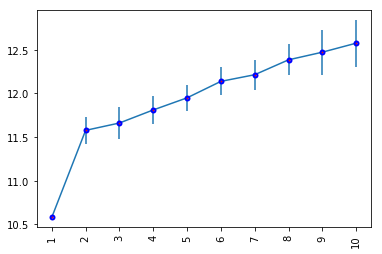

In [20]:
cattonum(train,test,'TotRmsAbvGrd','SalePrice')

In [21]:
(test['TotRmsAbvGrd']==1).sum()

0

In [22]:
train_cont[train_cont['TotRmsAbvGrd']==1]['TotRmsAbvGrd']=2

In [23]:
droplist

['GarageQual_Ex',
 'Electrical_Mix',
 'Electrical_None',
 'Condition2_RRAn',
 'Condition2_RRNn']

In [24]:
(p-train['SalePrice']).skew()

1.1401002517066334

In [25]:
0.10242614747503288

0.10242614747503288